In [23]:
from sklearn.metrics import (ConfusionMatrixDisplay,classification_report,confusion_matrix)
from sklearn.model_selection import GridSearchCV, train_test_split,cross_val_score 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import make_pipeline 
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io.arff import loadarff 
import xgboost as xgb
import pickle
import pandas as pd
import numpy as np

In [13]:
def read_data(file):
    df = pd.read_csv(file)
    return df
    
eng= read_data(r'C:\Users\mussie\Music\exam\ML-exam-Preparation\teleco_da\Engagement_data.csv')
exp = read_data(r'C:\Users\mussie\Music\exam\ML-exam-Preparation\teleco_da\Experience_data.csv')
fie = read_data(r'C:\Users\mussie\Music\exam\ML-exam-Preparation\teleco_da\all_scores.csv')

    

In [15]:

exp.head(4)

,MSISDN/Number,AVG_RTT,AVG_TP,TCP_Re,Handset Type,cluster
0,3.360100e+10,46.000000,76.0,2.156957e+07,Huawei P20 Lite Huawei Nova 3E,0
1,3.360100e+10,31.000000,99.0,2.156957e+07,Apple iPhone 7 (A1778),0
2,3.360100e+10,127.458589,97.0,2.156957e+07,undefined,0
3,3.360101e+10,84.000000,248.0,7.607247e+05,Apple iPhone 5S (A1457),0


In [18]:
# Assuming you have a DataFrame called 'df' with columns 'MSISDN/Number', 'Handset Type', and other columns
top_10_handsets = exp.groupby('MSISDN/Number')['Handset Type'].value_counts().nlargest(10)

print(top_10_handsets)

MSISDN/Number  Handset Type                                    
3.360100e+10   Huawei P20 Lite Huawei Nova 3E                      1
               Apple iPhone 7 (A1778)                              1
               undefined                                           1
3.360101e+10   Apple iPhone 5S (A1457)                             1
               Apple iPhone Se (A1723)                             1
               Samsung Galaxy A8 (2018)                            1
               Huawei Mate 10 Pro Porsche Design Huawei Mate 10    1
               Samsung Galaxy S8 Plus (Sm-G955F)                   1
               undefined                                           1
3.360102e+10   Apple iPhone X (A1865)                              1
Name: Handset Type, dtype: int64


In [19]:

# Group by customers and count the occurrences of each handset type
customer_handset_counts = exp.groupby('MSISDN/Number')['Handset Type'].value_counts().sort_values(ascending=False).head(10)

MSISDN/Number  Handset Type                      
3.360100e+10   Huawei P20 Lite Huawei Nova 3E        1
3.366914e+10   Apple iPhone 8 (A1905)                1
3.366916e+10   Apple iPhone Xr (A2105)               1
               Samsung Galaxy S8 Plus (Sm-G955Fd)    1
               Samsung Galaxy J5 (Sm-J530)           1
               Samsung Galaxy J5 (Sm-J530)           1
               Huawei B528S-23A                      1
               Samsung Galaxy J5 (Sm-J530)           1
               Samsung Galaxy J5 (Sm-J530)           1
               Samsung Xcover 3 (Sm-G388X)           1
Name: Handset Type, dtype: int64


C:\Users\mussie\AppData\Local\Temp\ipykernel_13656\1608980121.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = exp.corr()


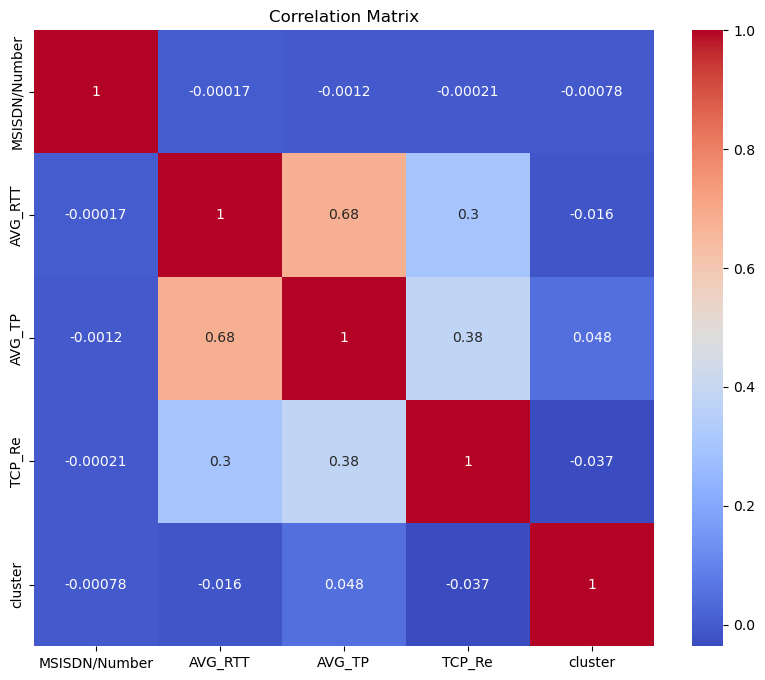

In [24]:
# Assuming you have a DataFrame called 'df' with multiple columns

# Calculate the correlation matrix
correlation_matrix = exp.corr()

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=ax)

# Set the title
ax.set_title('Correlation Matrix')

# Show the plot
plt.show()

In [28]:
exp.head(2)

,MSISDN/Number,AVG_RTT,AVG_TP,TCP_Re,Handset Type,cluster
0,3.360100e+10,46.0,76.0,2.156957e+07,Huawei P20 Lite Huawei Nova 3E,0
1,3.360100e+10,31.0,99.0,2.156957e+07,Apple iPhone 7 (A1778),0


In [29]:
eng.head(2)

,MSISDN/Number,Bearer Id,Dur. (ms),Total,cluster
0,3.360100e+10,1,116720,878.690574,0
1,3.360100e+10,1,181230,156.859643,0


Utitlity function

In [ ]:

#Create a histogram showing the distribution of apartment prices
# Build histogram
plt.hist(df["price_aprox_usd"])
# Label axes
plt.xlabel("Price [$]")
plt.ylabel("Count")
# Add title
plt.title('Distribution of Apartment')
     

In [ ]:
#Create a scatter plot that shows apartment price  as a function of apartment size
# Build scatter plot
plt.scatter(x = df['surface_covered_in_m2'], y=df['price_aprox_usd'])
plt.ylabel('Price [USD]')
plt.xlabel('Area [sq meters]')
plt.title('Mexico City: Price vs. Area')

In [ ]:

# Build Model
model = make_pipeline(
    OneHotEncoder(categories='auto',handle_unknown='ignore'), 
    SimpleImputer(),
    Ridge()
)
model.fit(X_train,y_train)
     

In [ ]:
 Build your `wrangle` function
def wrangle(filpath):
    df= pd.read_csv(filpath,encoding="latin1")
    mask_ba = df["place_with_parent_names"].str.contains("Distrito Federal")
    mask_apt = df["property_type"] == "apartment"
    mask_price = df["price_aprox_usd"] < 100_000
    df = df[mask_ba & mask_apt & mask_price]
    # Subset data: Remove outliers for "surface_covered_in_m2"
    low, high = df["surface_covered_in_m2"].quantile([0.1, 0.9])
    mask_area = df["surface_covered_in_m2"].between(low, high)
    df = df[mask_area]
    # Split "lat-lon" column
    df[["lat", "lon"]] = df["lat-lon"].str.split(",", expand=True).astype(float)
    df.drop(columns="lat-lon", inplace=True)
     # Get place name
    df["borough"] = df["place_with_parent_names"].str.split("|", expand=True)[1]
    df.drop(columns="place_with_parent_names", inplace=True)
     # droping columns which are lots of nullvalue
    df.drop(columns = ["floor","rooms","expenses","surface_total_in_m2","price_usd_per_m2"],inplace = True)
     # droping columns that have either to high or to low cardinality
    df.drop(columns =['operation','property_type','currency','properati_url'],inplace = True)
      #droping columns that have likage 
    df.drop(columns =['price', 'price_aprox_local_currency','price_per_m2'],inplace =True)
     #droping columns that have multi colinarity
     # df.drop(columns =['surface_covered_in_m2'],inplace =True)
    df.drop(columns="Unnamed: 0",inplace=True)
   
    return df